In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


### EDA

In [25]:
df = pd.read_csv("C:/Users/johan/OneDrive/Copenhagen/CBS/3rd Semester/Applied ML/Exam_Old/Carseats.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [27]:
#transform categorical values of  US and Urban into numbers via labelencoder, and Shelve Loc with manuaally replacing values to determine order
# Creating dummy features
df = pd.get_dummies(df, columns=['ShelveLoc'], prefix='ShelveLoc')
df = pd.get_dummies(df, columns=['Urban'], prefix='Urban')
df = pd.get_dummies(df, columns=['US'], prefix='US')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [28]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000,0.240000,0.212500,0.547500,0.295000,0.705000,0.355000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528,0.427618,0.409589,0.498362,0.456614,0.456614,0.479113,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
df.isna().sum()

Sales               0
CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
Education           0
ShelveLoc_Bad       0
ShelveLoc_Good      0
ShelveLoc_Medium    0
Urban_No            0
Urban_Yes           0
US_No               0
US_Yes              0
dtype: int64

array([[<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'CompPrice'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Advertising'}>],
       [<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'ShelveLoc_Bad'}>,
        <Axes: title={'center': 'ShelveLoc_Good'}>,
        <Axes: title={'center': 'ShelveLoc_Medium'}>,
        <Axes: title={'center': 'Urban_No'}>],
       [<Axes: title={'center': 'Urban_Yes'}>,
        <Axes: title={'center': 'US_No'}>,
        <Axes: title={'center': 'US_Yes'}>, <Axes: >]], dtype=object)

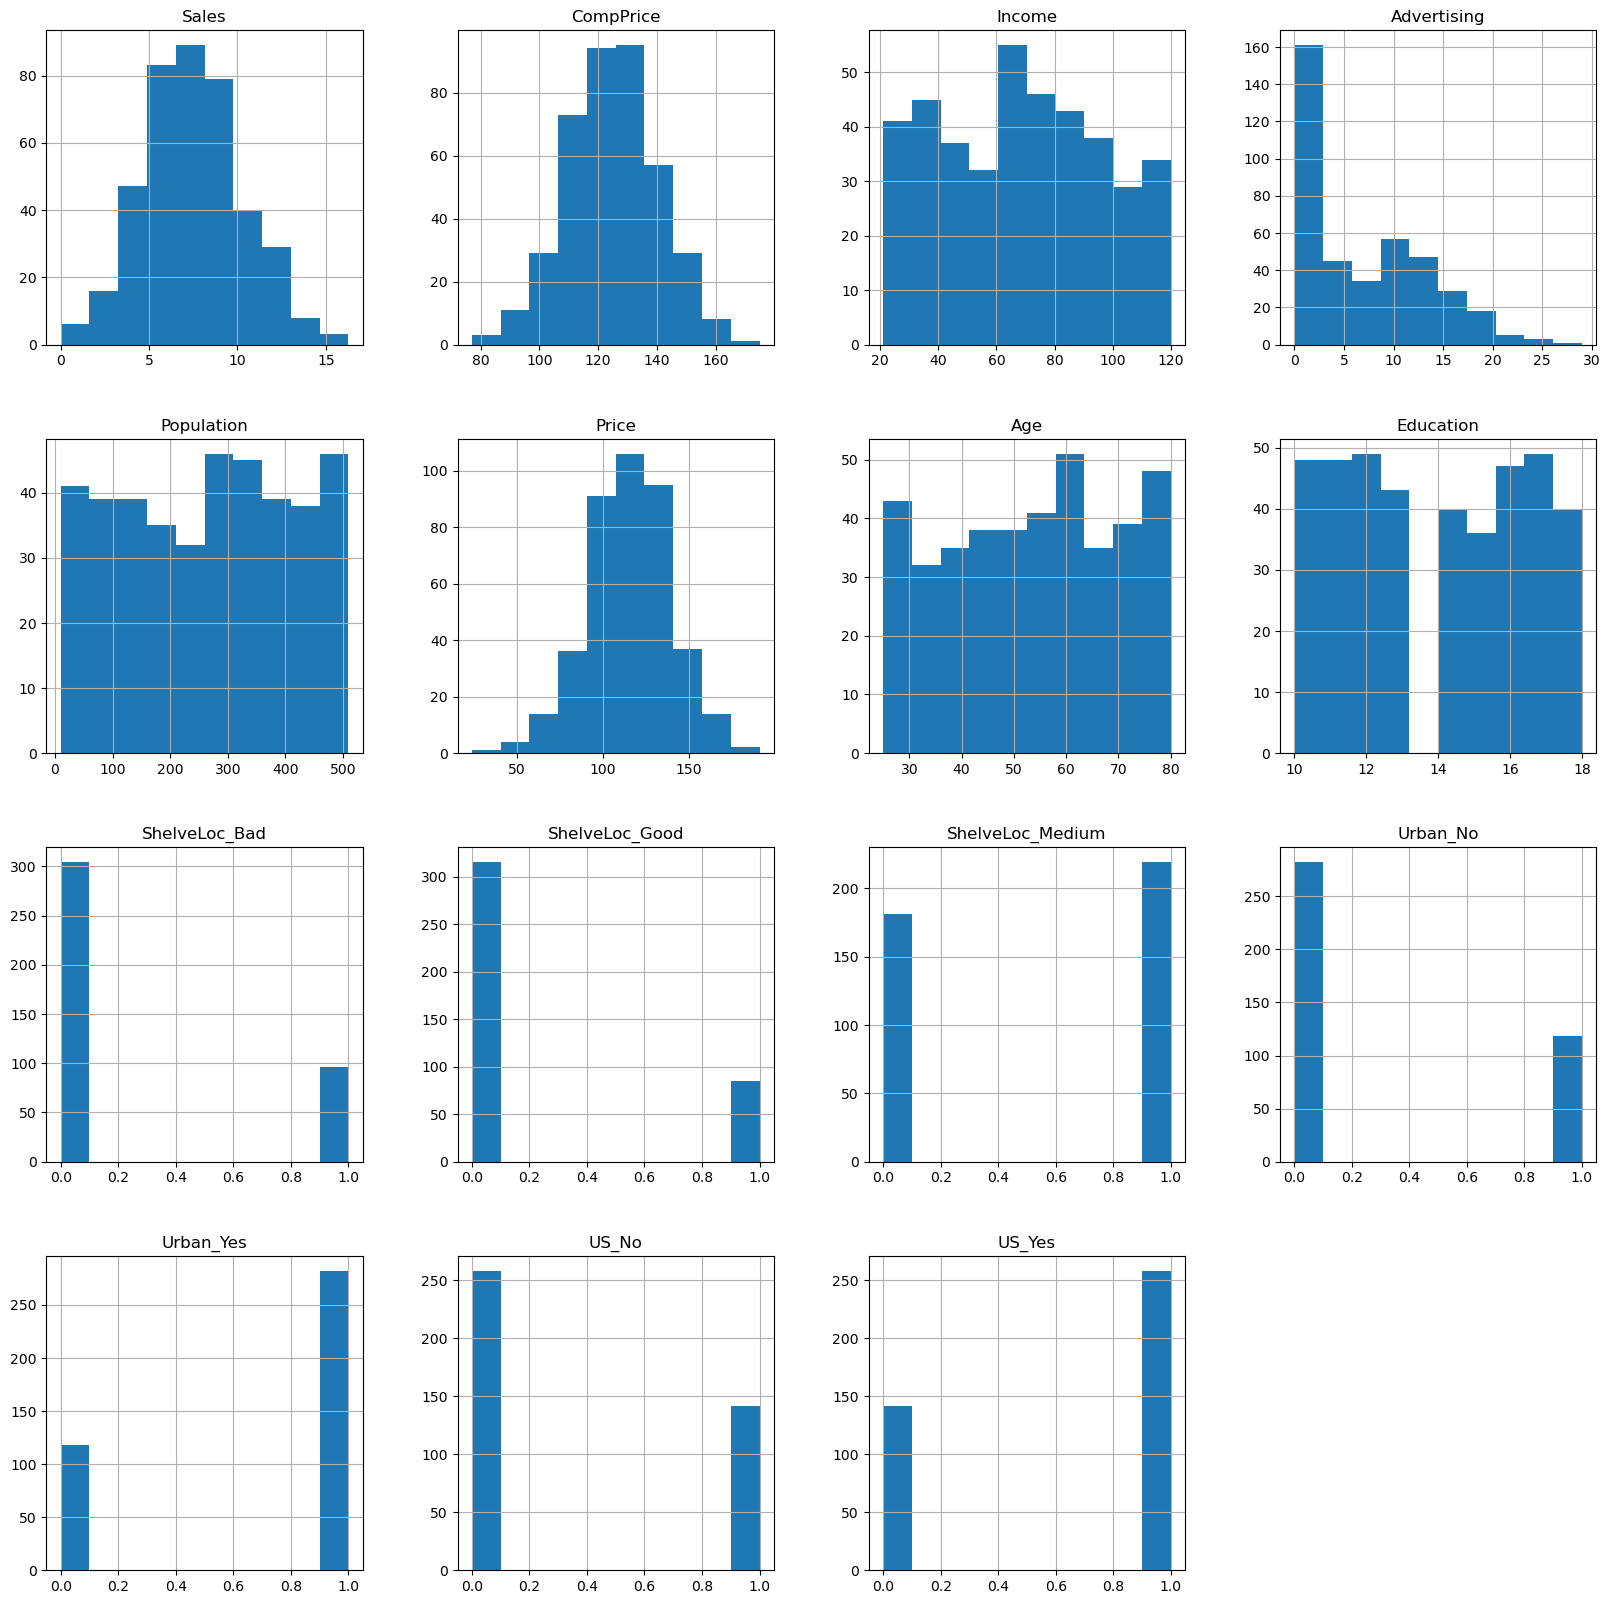

In [30]:
df.hist(bins=10, figsize=(20,20))

No missing values, no outliers, normal distribution of sales 
could normalize data 

Seems to be cheaper than competitors
around 65 % of our customers are from US
equal share of all education level and age, similar for income
Most shelve location is medium
Majority of stores in urban area

In [31]:
# Creating new feature to handle colinearity
df["PriceDiff"] = df["Price"] - df["CompPrice"]
df.drop(columns=['CompPrice', 'Price'], inplace=True)
df.head()

#positive number when we are more expensive and negative when we are cheaper

,Sales,Income,Advertising,Population,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,PriceDiff
0,9.50,73,11,276,42,17,1,0,0,0,1,0,1,-18
1,11.22,48,16,260,65,10,0,1,0,0,1,0,1,-28
2,10.06,35,10,269,59,12,0,0,1,0,1,0,1,-33
3,7.40,100,4,466,55,14,0,0,1,0,1,0,1,-20
4,4.15,64,3,340,38,13,1,0,0,0,1,1,0,-13


In [32]:
#correlation matrix 
corr_matrix = df.corr()
corr_matrix["Sales"].sort_values(ascending=False)

Sales               1.000000
ShelveLoc_Good      0.500510
Advertising         0.269507
US_Yes              0.177093
Income              0.151951
Population          0.050471
Urban_No            0.015419
Urban_Yes          -0.015419
Education          -0.051955
ShelveLoc_Medium   -0.073999
US_No              -0.177093
Age                -0.231815
ShelveLoc_Bad      -0.393167
PriceDiff          -0.597922
Name: Sales, dtype: float64

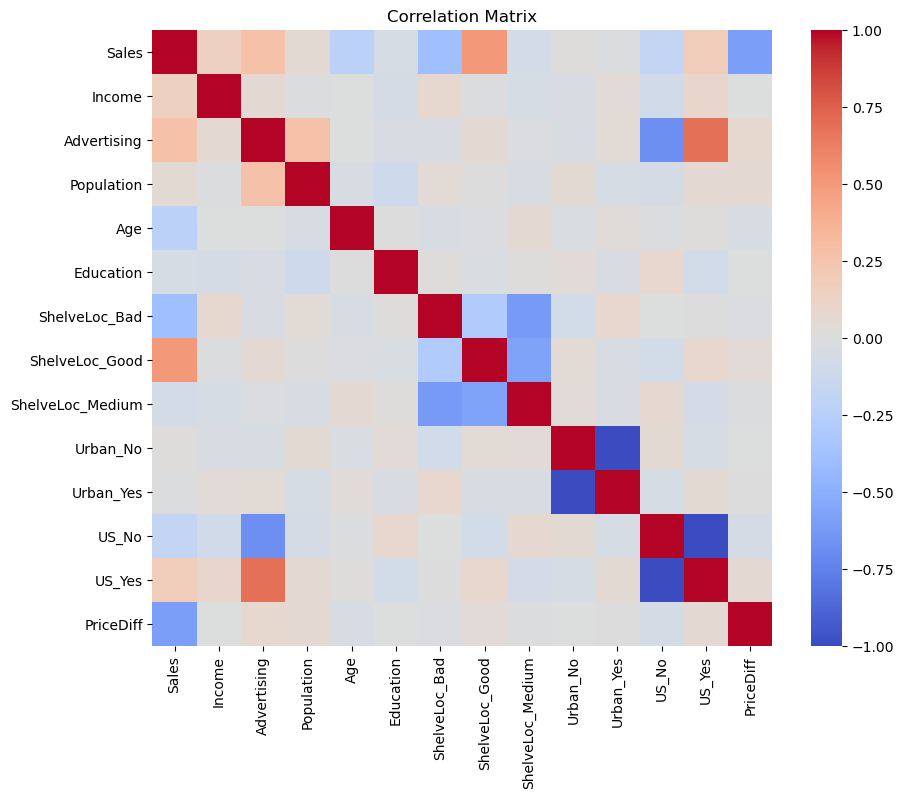

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Biggest positive correlation with price difference between us and competitors, shelve loc, advertising, and US

negative correlation with age, and price

Price seems to be a very important purchasing factor

### Check feature importance with pca

In [34]:
#exclude sales because it is target variable
x = df.iloc[:, 1:]
x.head()

,Income,Advertising,Population,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,PriceDiff
0,73,11,276,42,17,1,0,0,0,1,0,1,-18
1,48,16,260,65,10,0,1,0,0,1,0,1,-28
2,35,10,269,59,12,0,0,1,0,1,0,1,-33
3,100,4,466,55,14,0,0,1,0,1,0,1,-20
4,64,3,340,38,13,1,0,0,0,1,1,0,-13


In [35]:
components = None
pca = PCA(n_components = components) #or n_components = desired % of variance explained
# perform PCA on the scaled data
pca.fit(x)

print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[9.36859855e+01 3.37829740e+00 1.60195348e+00 1.12254408e+00
 1.76683584e-01 2.91912433e-02 1.82009628e-03 1.58879725e-03
 9.89917488e-04 9.45901406e-04 3.91992163e-35 1.62191377e-35
 1.43594021e-35]



In [36]:
#get cumulative variance
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 93.6859855   97.0642829   98.66623638  99.78878046  99.96546404
  99.99465529  99.99647538  99.99806418  99.9990541  100.
 100.         100.         100.        ]



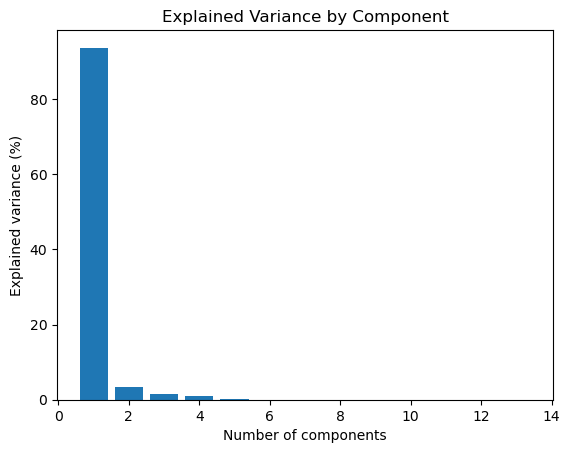

In [37]:
# Number of components you want to display
components = len(pca.explained_variance_ratio_) if components is None else components

# Create a bar chart
plt.bar(range(1, components + 1), pca.explained_variance_ratio_ * 100)

plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.title("Explained Variance by Component")

# Show the bar chart
plt.show()

In [38]:
#how much each feature contribures to each component
pca_components = abs(pca.components_)

In [39]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {x.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['Population', 'Advertising', 'PriceDiff', 'Age']
Component 1: ['Income', 'Advertising', 'PriceDiff', 'Education']
Component 2: ['PriceDiff', 'Age', 'Advertising', 'Population']
Component 3: ['Age', 'PriceDiff', 'Advertising', 'Income']
Component 4: ['Advertising', 'US_Yes', 'US_No', 'PriceDiff']
Component 5: ['Education', 'US_Yes', 'US_No', 'Urban_Yes']
Component 6: ['Urban_No', 'Urban_Yes', 'ShelveLoc_Medium', 'ShelveLoc_Bad']
Component 7: ['ShelveLoc_Medium', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'Urban_No']
Component 8: ['US_No', 'US_Yes', 'ShelveLoc_Bad', 'ShelveLoc_Good']
Component 9: ['ShelveLoc_Good', 'ShelveLoc_Bad', 'US_No', 'US_Yes']
Component 10: ['ShelveLoc_Medium', 'ShelveLoc_Good', 'ShelveLoc_Bad', 'US_No']
Component 11: ['Urban_Yes', 'Urban_No', 'ShelveLoc_Good', 'ShelveLoc_Medium']
Component 12: ['US_Yes', 'US_No', 'ShelveLoc_Medium', 'ShelveLoc_Good']


Confirms that Price, Pricediff and advertising are most important features

Is population relevant? as it is in first component on first place? No correlation in correlation matrix and only in first component under top 4


### Predictor models

In [40]:
#create train and test dataset
X = df.iloc[:, 1:]
y = df.iloc[:, 0:1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression

In [41]:
# Initialising linear Regression 

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred_lr = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error Linear Regression: {mse}")
print(f"R-squared Linear Regression: {r2}")

Mean Squared Error Linear Regression: 1.058779453791311
R-squared Linear Regression: 0.8930115409963564


Decision Tree

In [43]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error DecisionTree: {mse}")
print(f"R-squared DecisionTree: {r2}")

Mean Squared Error DecisionTree: 4.690264999999999
R-squared DecisionTree: 0.526054058877089


Random Forest

In [44]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error RandomForest: {mse}")
print(f"R-squared RandomForest: {r2}")

C:\Users\johan\AppData\Local\Temp\ipykernel_13372\3232581082.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Mean Squared Error RandomForest: 1.5885253651249986
R-squared RandomForest: 0.8394813194623794


### Linear Regression performs the best, therefore we will focus on linear regression for hyperparameter tuning to increase perforamce

Get Top 10 over and underperforming score

In [45]:
# Assuming y_pred is your predicted values
#y_pred_flattened = np.ravel(y_pred_lr)
index = y_test.index
# Create a DataFrame with predicted values
y_pred_df = pd.DataFrame(y_pred_lr, index=index)
y_pred_df.columns = ["Predicted"]
# Display the DataFrame
y_pred_df.head()

,Predicted
209,3.889479
280,3.085121
33,8.394672
210,3.788953
93,9.009055


In [46]:
#join both y_test and y_pred_df on index
merged_df = pd.merge(y_test, y_pred_df, left_index=True, right_index=True)
merged_df.head()

,Sales,Predicted
209,3.02,3.889479
280,2.86,3.085121
33,8.77,8.394672
210,4.36,3.788953
93,8.86,9.009055


In [47]:
merged_df["Performance"] = merged_df["Sales"] - merged_df["Predicted"]
merged_df.head()

,Sales,Predicted,Performance
209,3.02,3.889479,-0.869479
280,2.86,3.085121,-0.225121
33,8.77,8.394672,0.375328
210,4.36,3.788953,0.571047
93,8.86,9.009055,-0.149055


In [48]:
overperforming_stores = merged_df.nlargest(15, "Performance")
underperforming_stores = merged_df.nsmallest(15, "Performance")

In [49]:
overperforming_df = pd.merge(overperforming_stores, df, left_index=True, right_index=True)
overperforming_df.drop(columns=['Sales_y'], inplace=True)
overperforming_df.rename(columns={"Sales_x": "Sales"},inplace = True)
overperforming_df

,Sales,Predicted,Performance,Income,Advertising,Population,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,PriceDiff
15,8.71,6.180519,2.529481,95,5,400,76,18,0,0,1,1,0,1,0,-5
0,9.50,7.224770,2.275230,73,11,276,42,17,1,0,0,0,1,0,1,-18
352,13.44,11.352786,2.087214,103,14,288,61,17,0,1,0,0,1,0,1,-11
55,6.85,4.866121,1.983879,81,5,60,61,18,0,0,1,0,1,0,1,11
374,9.44,7.691556,1.748444,47,7,90,47,12,0,0,1,0,1,0,1,-13
132,9.54,7.986936,1.553064,87,9,232,72,10,0,1,0,0,1,0,1,11
25,14.90,13.471361,1.428639,32,0,176,54,11,0,1,0,1,0,1,0,-57
114,9.31,7.953208,1.356792,87,9,17,65,13,0,0,1,0,1,0,1,-16
381,3.90,2.587396,1.312604,65,21,496,77,13,1,0,0,0,1,0,1,27
5,10.81,9.596017,1.213983,113,13,501,78,16,1,0,0,1,0,0,1,-52


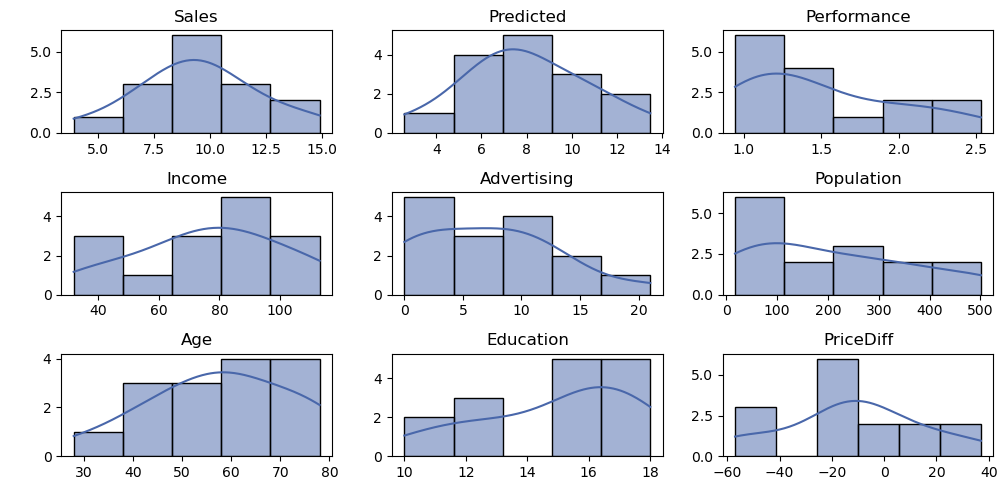

In [50]:
# Visualizing numerical features
num_features = overperforming_df.select_dtypes(["float64", "int64"])

fig = plt.figure(figsize=(10, 5))

# Define the custom color using the hex code
custom_color = '#4967AA'

for i, j in enumerate(num_features):
    ax = fig.add_subplot(3, 3, i + 1)
    
    # Use the specified custom color for histplots
    ax = sns.histplot(data=num_features, x=j, color=custom_color, kde=True, bins='auto') 
    
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
plt.show()

In [51]:
underperforming_df = pd.merge(underperforming_stores, df, left_index=True, right_index=True)
underperforming_df.drop(columns=['Sales_y'], inplace=True)
underperforming_df.rename(columns={"Sales_x": "Sales"},inplace = True)
underperforming_df

,Sales,Predicted,Performance,Income,Advertising,Population,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,PriceDiff
321,7.52,9.426086,-1.906086,39,5,499,34,15,0,0,1,0,1,1,0,-25
382,4.95,6.817082,-1.867082,28,19,315,66,14,0,0,1,0,1,0,1,0
101,6.20,8.007277,-1.807277,93,0,89,34,18,0,0,1,0,1,1,0,-10
172,9.03,10.800837,-1.770837,102,13,123,35,16,0,1,0,0,1,0,1,6
266,9.10,10.748578,-1.648578,93,12,343,73,17,0,1,0,1,0,0,1,-16
268,6.53,8.126798,-1.596798,57,0,66,39,11,0,0,1,0,1,1,0,-18
152,7.64,9.178853,-1.538853,78,0,341,45,13,0,1,0,1,0,1,0,0
140,6.03,7.432800,-1.402800,60,10,277,45,18,0,0,1,0,1,0,1,-4
77,7.70,9.016443,-1.316443,71,12,44,67,18,0,0,1,1,0,0,1,-29
388,8.14,9.443015,-1.303015,89,11,245,79,16,1,0,0,0,1,0,1,-57


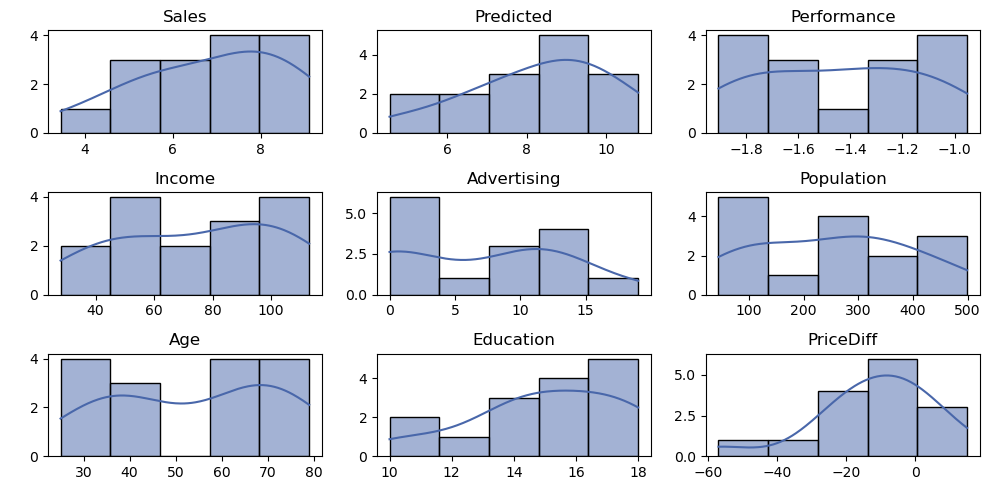

In [52]:
# Visualizing numerical features
num_features = underperforming_df.select_dtypes(["float64", "int64"])

fig = plt.figure(figsize=(10, 5))

# Define the custom color using the hex code
custom_color = '#4967AA'

for i, j in enumerate(num_features):
    ax = fig.add_subplot(3, 3, i + 1)
    
    # Use the specified custom color for histplots
    ax = sns.histplot(data=num_features, x=j, color=custom_color, kde=True, bins='auto') 
    
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
plt.show()

In [53]:
plt.figure(figsize = (12,12))
plt.scatter(y_test["Index"], y_test["Sales"], label='Actual', color='blue')
plt.scatter(y_pred_df["Index"], y_pred_df["Predicted"], label='Predicted', color='red')

# Add labels and a legend
plt.xlabel("Index")
plt.ylabel("Sales")
plt.legend()

# Show the plot
plt.show()

KeyError: 'Index'

<Figure size 1200x1200 with 0 Axes>